<h1>Ground Water Quality Analysis</h1>

#### Analysis of water chemical informaion from all across india,EDA & model whether a water is drinkable or not

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
data=pd.read_excel(r"C:\Users\91964\Documents\New folder (5)\cs-ground-water-quality-analysis-2021\GroundWaterQuality.xlsx")
data.head()

,Well ID,S.No,STATE,DISTRICT,BLOCK,LOCATION,LATITUDE,LONGITUDE,Year,pH,...,PO4,TH,Ca,Mg,Na,K,F,SiO2,TDS,U(ppb)
0,W113126092431802,1,A&N Islands,South Andaman,PORT BLAIR,Kodiaghat,11.54500,92.74583,2021,7.74,...,NaN,175.0,34.0,22.0,10.0,0.0,0.84,NaN,206.0,4.8
1,W113616092411001,2,A&N Islands,South Andaman,PORT BLAIR,Sippighat,11.60250,92.73000,2021,7.53,...,NaN,250.0,52.0,29.0,51.0,1.0,0.28,NaN,381.0,6.4
2,W113640092443301,3,A&N Islands,South Andaman,PORT BLAIR,Brichganj,11.62083,92.73028,2021,7.50,...,NaN,125.0,4.0,28.0,10.0,1.0,0.46,NaN,151.0,BDL
3,W114421092422801,4,A&N Islands,South Andaman,FERRARGUNJ,Wimberleyganj,11.73250,92.70861,2021,7.60,...,NaN,135.0,26.0,17.0,15.0,2.0,0.37,NaN,198.0,0.4
4,W113955092391801,5,A&N Islands,South Andaman,FERRARGUNJ,Ograbraj,11.66361,92.65806,2021,7.82,...,NaN,465.0,56.0,79.0,336.0,18.0,0.95,NaN,1424.0,BDL


In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No,9059.0,4530.000000,2615.252378,1.0000,2265.500000,4530.0000,6794.50000,9059.00
LATITUDE,9036.0,82.956861,3836.477584,8.0833,21.099827,23.5296,26.79365,292505.00
LONGITUDE,9039.0,8509.949469,775790.829004,21.0000,76.114600,78.8982,83.19000,73744005.00
Year,9059.0,2021.000000,0.000000,2021.0000,2021.000000,2021.0000,2021.00000,2021.00
EC,9059.0,1140.598720,1561.435325,0.0000,438.000000,723.0000,1242.50000,37230.00
HCO3,9059.0,273.613763,173.313292,0.0000,159.000000,250.0000,356.00000,1915.00
Cl,9059.0,166.245229,394.889199,0.0000,25.000000,57.0000,149.00000,9075.00
TH,9059.0,301.899638,315.453527,0.0000,150.000000,230.0000,350.00000,5454.36
Ca,9058.0,57.129489,54.473873,0.0000,24.540000,44.0000,72.00000,1014.00
Mg,9059.0,38.545363,53.306452,-23.0000,13.450000,26.0000,44.00000,1136.00


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9059 entries, 0 to 9058
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Well ID    5789 non-null   object 
 1   S.No       9059 non-null   int64  
 2   STATE      9059 non-null   object 
 3   DISTRICT   9059 non-null   object 
 4   BLOCK      8865 non-null   object 
 5   LOCATION   9058 non-null   object 
 6   LATITUDE   9036 non-null   float64
 7   LONGITUDE  9039 non-null   float64
 8   Year       9059 non-null   int64  
 9   pH         9059 non-null   object 
 10  EC         9059 non-null   float64
 11  CO3        9059 non-null   object 
 12  HCO3       9059 non-null   float64
 13  Cl         9059 non-null   float64
 14  SO4        9057 non-null   object 
 15  NO3        9059 non-null   object 
 16  PO4        5715 non-null   object 
 17  TH         9059 non-null   float64
 18  Ca         9058 non-null   float64
 19  Mg         9059 non-null   float64
 20  Na      

In [9]:
data.columns

Index(['Well ID', 'S.No', 'STATE', 'DISTRICT', 'BLOCK', 'LOCATION', 'LATITUDE',
       'LONGITUDE', 'Year', 'pH', 'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3',
       'PO4', 'TH', 'Ca', 'Mg', 'Na', 'K', 'F', 'SiO2', 'TDS', 'U(ppb)'],
      dtype='object')

## Data cleaning


In [10]:
dhew=data.drop(["Well ID","S.No","BLOCK","Year"],axis=1)
dhew

,STATE,DISTRICT,LOCATION,LATITUDE,LONGITUDE,pH,EC,CO3,HCO3,Cl,...,PO4,TH,Ca,Mg,Na,K,F,SiO2,TDS,U(ppb)
0,A&N Islands,South Andaman,Kodiaghat,11.54500,92.74583,7.74,349.0,0,183.0,25.0,...,NaN,175.0,34.0,22.0,10.0,0.0,0.84,NaN,206.0,4.8
1,A&N Islands,South Andaman,Sippighat,11.60250,92.73000,7.53,660.0,0,262.0,82.0,...,NaN,250.0,52.0,29.0,51.0,1.0,0.28,NaN,381.0,6.4
2,A&N Islands,South Andaman,Brichganj,11.62083,92.73028,7.50,270.0,0,116.0,35.0,...,NaN,125.0,4.0,28.0,10.0,1.0,0.46,NaN,151.0,BDL
3,A&N Islands,South Andaman,Wimberleyganj,11.73250,92.70861,7.60,311.0,0,159.0,39.0,...,NaN,135.0,26.0,17.0,15.0,2.0,0.37,NaN,198.0,0.4
4,A&N Islands,South Andaman,Ograbraj,11.66361,92.65806,7.82,2501.0,0,512.0,560.0,...,NaN,465.0,56.0,79.0,336.0,18.0,0.95,NaN,1424.0,BDL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9054,West Bengal,South 24 Parganas,Digambari (rudranagar),21.70080,88.11250,8.53,827.0,27,256.0,117.0,...,NaN,235.0,26.0,41.0,122.0,4.2,0,NaN,521.0,9.28
9055,West Bengal,South 24 Parganas,Ganga Sagar,22.55580,88.59690,8.48,755.0,30,275.0,99.0,...,NaN,175.0,24.0,28.0,120.0,3.8,0,NaN,460.0,0.49
9056,West Bengal,South 24 Parganas,Kochuberia rc jetty ghat,21.85440,88.29780,8.48,856.0,30,262.0,131.0,...,NaN,170.0,14.0,33.0,135.0,4.6,0,NaN,496.0,0.02
9057,West Bengal,South 24 Parganas,Langalberia,22.38560,88.40500,8.71,717.0,30,275.0,64.0,...,NaN,285.0,56.0,35.0,32.0,5.2,0.12,NaN,378.0,0.20


In [11]:
data.columns

Index(['Well ID', 'S.No', 'STATE', 'DISTRICT', 'BLOCK', 'LOCATION', 'LATITUDE',
       'LONGITUDE', 'Year', 'pH', 'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3',
       'PO4', 'TH', 'Ca', 'Mg', 'Na', 'K', 'F', 'SiO2', 'TDS', 'U(ppb)'],
      dtype='object')

In [12]:
num=['pH','CO3','SO4','NO3','PO4','U(ppb)','F','SiO2']
for i in num:
    dhew[i]=pd.to_numeric(dhew[i],errors='coerce')
dhew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9059 entries, 0 to 9058
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATE      9059 non-null   object 
 1   DISTRICT   9059 non-null   object 
 2   LOCATION   9058 non-null   object 
 3   LATITUDE   9036 non-null   float64
 4   LONGITUDE  9039 non-null   float64
 5   pH         9058 non-null   float64
 6   EC         9059 non-null   float64
 7   CO3        8964 non-null   float64
 8   HCO3       9059 non-null   float64
 9   Cl         9059 non-null   float64
 10  SO4        9056 non-null   float64
 11  NO3        9058 non-null   float64
 12  PO4        5551 non-null   float64
 13  TH         9059 non-null   float64
 14  Ca         9058 non-null   float64
 15  Mg         9059 non-null   float64
 16  Na         9059 non-null   float64
 17  K          9058 non-null   float64
 18  F          9010 non-null   float64
 19  SiO2       4729 non-null   float64
 20  TDS     

In [13]:
dhew.isna().sum()

STATE           0
DISTRICT        0
LOCATION        1
LATITUDE       23
LONGITUDE      20
pH              1
EC              0
CO3            95
HCO3            0
Cl              0
SO4             3
NO3             1
PO4          3508
TH              0
Ca              1
Mg              0
Na              0
K               1
F              49
SiO2         4330
TDS          4524
U(ppb)       6157
dtype: int64

In [14]:
dhew.duplicated().sum()

np.int64(3)

In [15]:
dup=dhew[dhew.duplicated()]
dup

,STATE,DISTRICT,LOCATION,LATITUDE,LONGITUDE,pH,EC,CO3,HCO3,Cl,...,PO4,TH,Ca,Mg,Na,K,F,SiO2,TDS,U(ppb)
4982,TAMIL NADU,Dharmapuri,Odasalapatti,12.1425,78.2917,7.50,2420.0,0.0,464.0,362.0,...,NaN,780.0,92.0,134.0,139.0,1.0,1.46,NaN,NaN,3.94
5056,TAMIL NADU,Kanyakumari,Kundal(west),8.1031,77.5439,7.60,1386.0,0.0,250.0,227.0,...,NaN,260.0,44.0,36.0,168.0,2.0,1.53,NaN,NaN,0.00
5119,TAMIL NADU,Thiruvannamalai,Nedumpirai OW,12.7078,79.5611,7.08,5580.0,0.0,207.0,1418.0,...,NaN,960.0,184.0,122.0,737.0,19.0,1.63,NaN,NaN,1.77


In [16]:
data1=dhew.drop(['pH','EC','CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg', 'Na', 'K','F'],axis=1 )
data1

,STATE,DISTRICT,LOCATION,LATITUDE,LONGITUDE,PO4,SiO2,TDS,U(ppb)
0,A&N Islands,South Andaman,Kodiaghat,11.54500,92.74583,NaN,NaN,206.0,4.80
1,A&N Islands,South Andaman,Sippighat,11.60250,92.73000,NaN,NaN,381.0,6.40
2,A&N Islands,South Andaman,Brichganj,11.62083,92.73028,NaN,NaN,151.0,NaN
3,A&N Islands,South Andaman,Wimberleyganj,11.73250,92.70861,NaN,NaN,198.0,0.40
4,A&N Islands,South Andaman,Ograbraj,11.66361,92.65806,NaN,NaN,1424.0,NaN
...,...,...,...,...,...,...,...,...,...
9054,West Bengal,South 24 Parganas,Digambari (rudranagar),21.70080,88.11250,NaN,NaN,521.0,9.28
9055,West Bengal,South 24 Parganas,Ganga Sagar,22.55580,88.59690,NaN,NaN,460.0,0.49
9056,West Bengal,South 24 Parganas,Kochuberia rc jetty ghat,21.85440,88.29780,NaN,NaN,496.0,0.02
9057,West Bengal,South 24 Parganas,Langalberia,22.38560,88.40500,NaN,NaN,378.0,0.20


In [17]:
data2=dhew.drop(["PO4","SiO2","TDS","U(ppb)"],axis=1)
data2

,STATE,DISTRICT,LOCATION,LATITUDE,LONGITUDE,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F
0,A&N Islands,South Andaman,Kodiaghat,11.54500,92.74583,7.74,349.0,0.0,183.0,25.0,1.0,1.0,175.0,34.0,22.0,10.0,0.0,0.84
1,A&N Islands,South Andaman,Sippighat,11.60250,92.73000,7.53,660.0,0.0,262.0,82.0,5.0,1.0,250.0,52.0,29.0,51.0,1.0,0.28
2,A&N Islands,South Andaman,Brichganj,11.62083,92.73028,7.50,270.0,0.0,116.0,35.0,1.0,0.0,125.0,4.0,28.0,10.0,1.0,0.46
3,A&N Islands,South Andaman,Wimberleyganj,11.73250,92.70861,7.60,311.0,0.0,159.0,39.0,2.0,0.0,135.0,26.0,17.0,15.0,2.0,0.37
4,A&N Islands,South Andaman,Ograbraj,11.66361,92.65806,7.82,2501.0,0.0,512.0,560.0,56.0,5.0,465.0,56.0,79.0,336.0,18.0,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9054,West Bengal,South 24 Parganas,Digambari (rudranagar),21.70080,88.11250,8.53,827.0,27.0,256.0,117.0,32.0,6.0,235.0,26.0,41.0,122.0,4.2,0.00
9055,West Bengal,South 24 Parganas,Ganga Sagar,22.55580,88.59690,8.48,755.0,30.0,275.0,99.0,0.0,0.0,175.0,24.0,28.0,120.0,3.8,0.00
9056,West Bengal,South 24 Parganas,Kochuberia rc jetty ghat,21.85440,88.29780,8.48,856.0,30.0,262.0,131.0,0.0,0.0,170.0,14.0,33.0,135.0,4.6,0.00
9057,West Bengal,South 24 Parganas,Langalberia,22.38560,88.40500,8.71,717.0,30.0,275.0,64.0,0.0,0.0,285.0,56.0,35.0,32.0,5.2,0.12


In [18]:
data2.isna().sum()

STATE         0
DISTRICT      0
LOCATION      1
LATITUDE     23
LONGITUDE    20
pH            1
EC            0
CO3          95
HCO3          0
Cl            0
SO4           3
NO3           1
TH            0
Ca            1
Mg            0
Na            0
K             1
F            49
dtype: int64

In [19]:
data2.dropna(inplace=True) #dropna= remove all null values

In [20]:
data2.isna().sum()

STATE        0
DISTRICT     0
LOCATION     0
LATITUDE     0
LONGITUDE    0
pH           0
EC           0
CO3          0
HCO3         0
Cl           0
SO4          0
NO3          0
TH           0
Ca           0
Mg           0
Na           0
K            0
F            0
dtype: int64

In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9059 entries, 0 to 9058
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATE      9059 non-null   object 
 1   DISTRICT   9059 non-null   object 
 2   LOCATION   9058 non-null   object 
 3   LATITUDE   9036 non-null   float64
 4   LONGITUDE  9039 non-null   float64
 5   PO4        5551 non-null   float64
 6   SiO2       4729 non-null   float64
 7   TDS        4535 non-null   float64
 8   U(ppb)     2902 non-null   float64
dtypes: float64(6), object(3)
memory usage: 637.1+ KB


## EDA

<h3>Heatmap of missing values</h3>

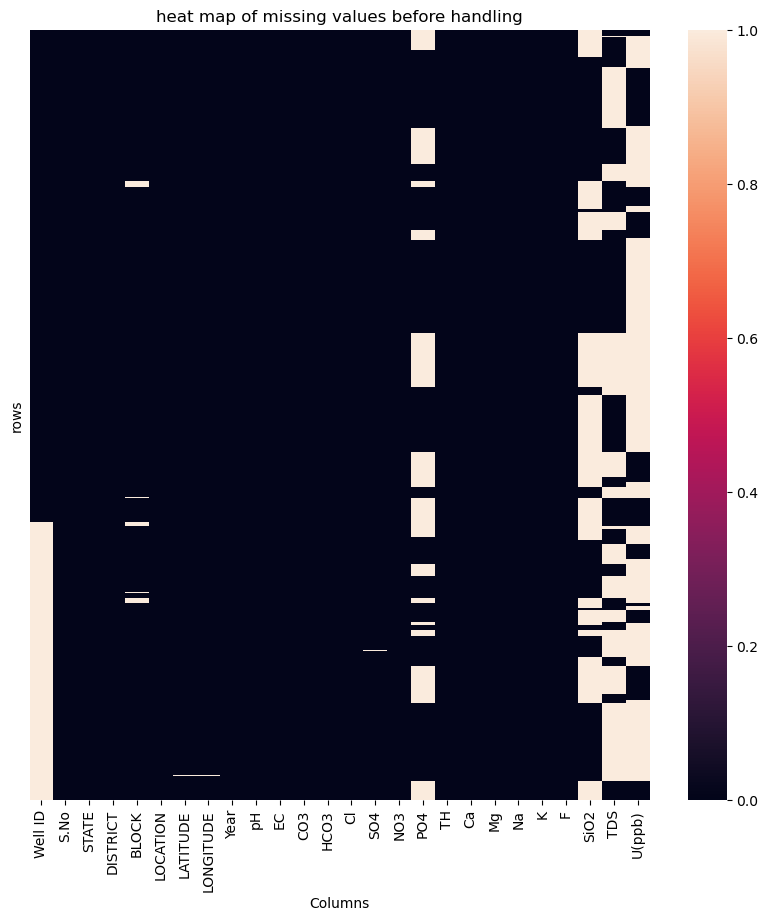

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isna(),yticklabels=False)
plt.title("heat map of missing values before handling")
plt.xlabel("Columns")
plt.ylabel("rows")
plt.show()

<h3 styles="background-color:cyan">we can see that important features p04,si02,tds,u(ppd) have more than 75% null values,so lets remove it from train data

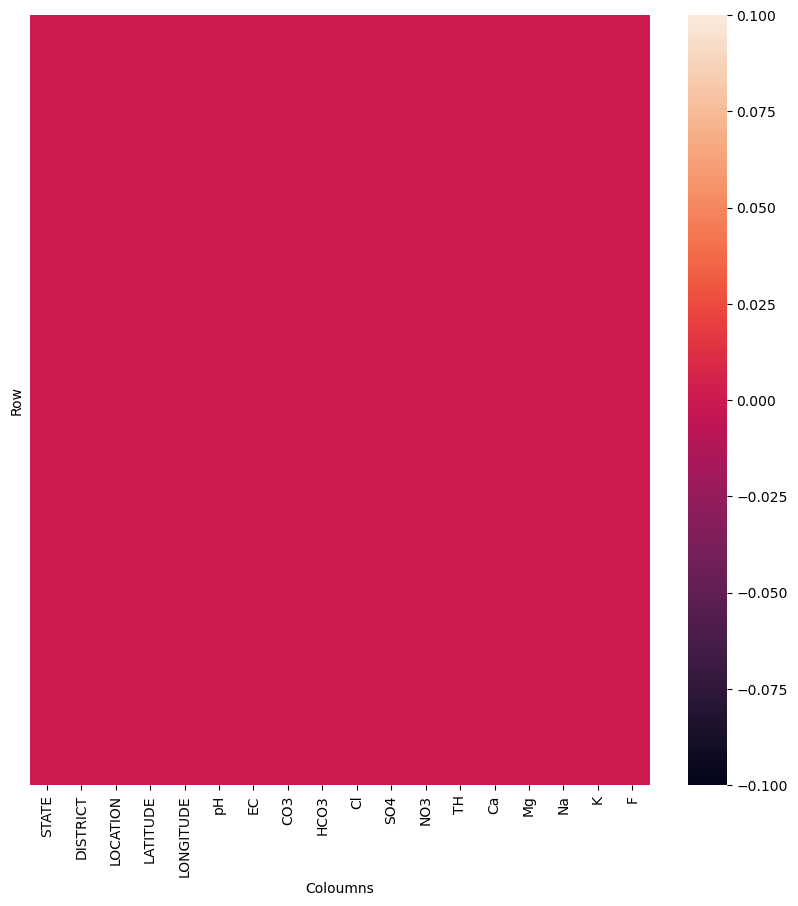

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(data2.isna(),yticklabels=False)
plt.xlabel("Coloumns")
plt.ylabel("Row")
plt.show()

<h3 styles="background-color:cyan">Remove features p04,si02,tds,u(ppb),droped all null values

## distribution of Quality parameters

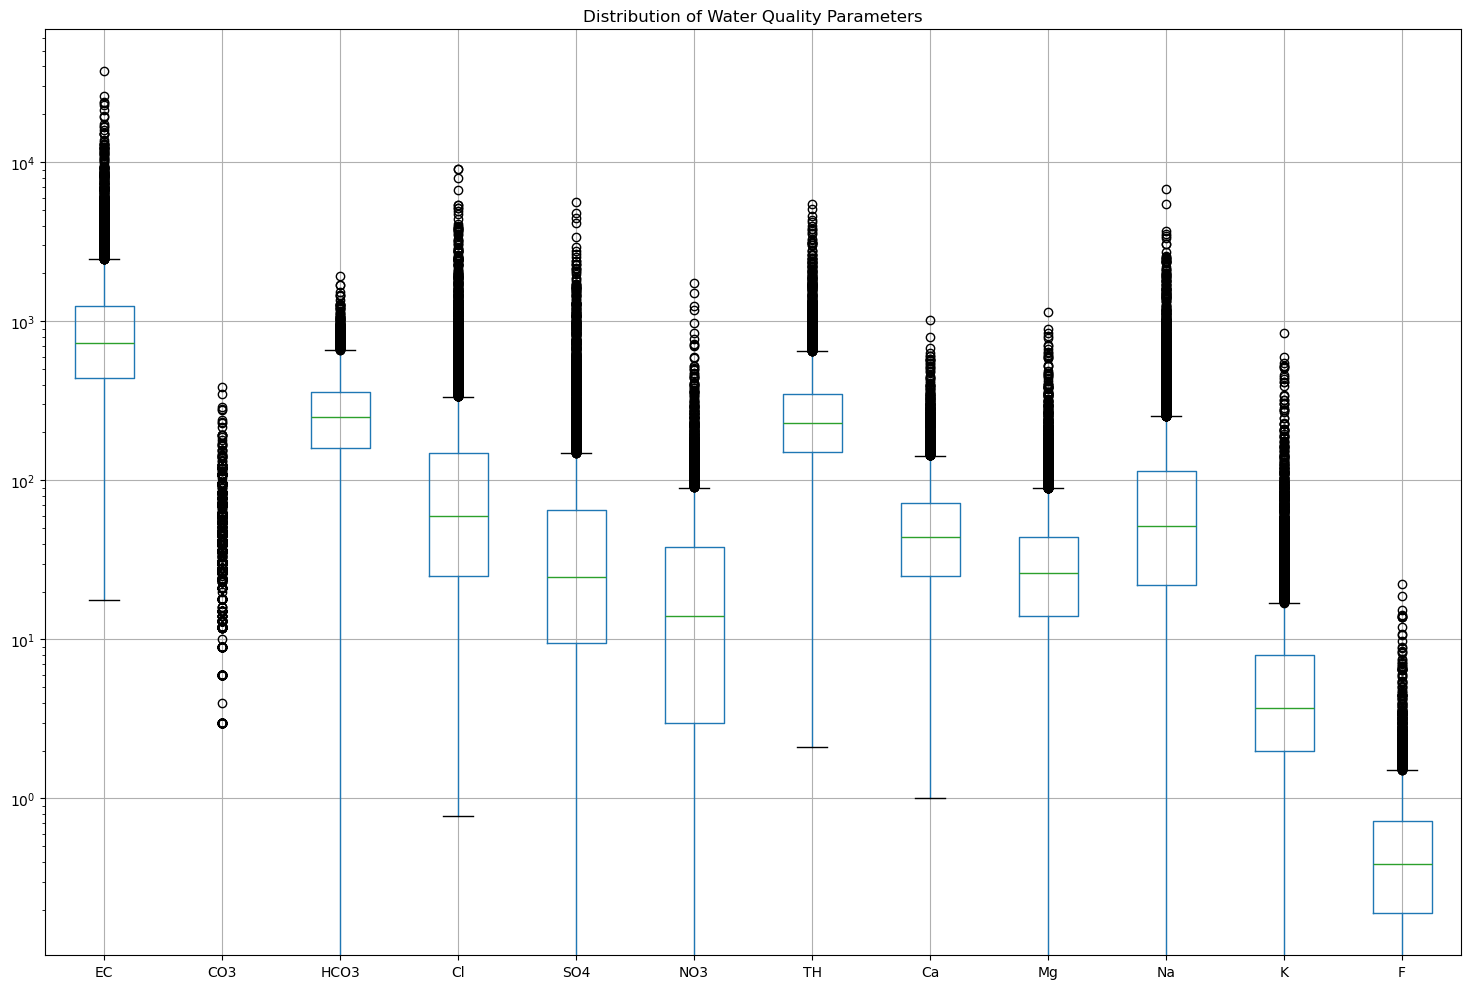

In [24]:
water_quality_params=['EC','CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg', 'Na', 'K', 'F']
plt.figure(figsize=(15, 10))
data2[water_quality_params].boxplot()
plt.title('Distribution of Water Quality Parameters')  # Using log scale as these parameters can have widely different scales
plt.tight_layout()
plt.yscale('log')
plt.show()

## The boxplot showing the distribution of different water quality parameters

<h3>state wise analysis of  water quality parameters</h3>

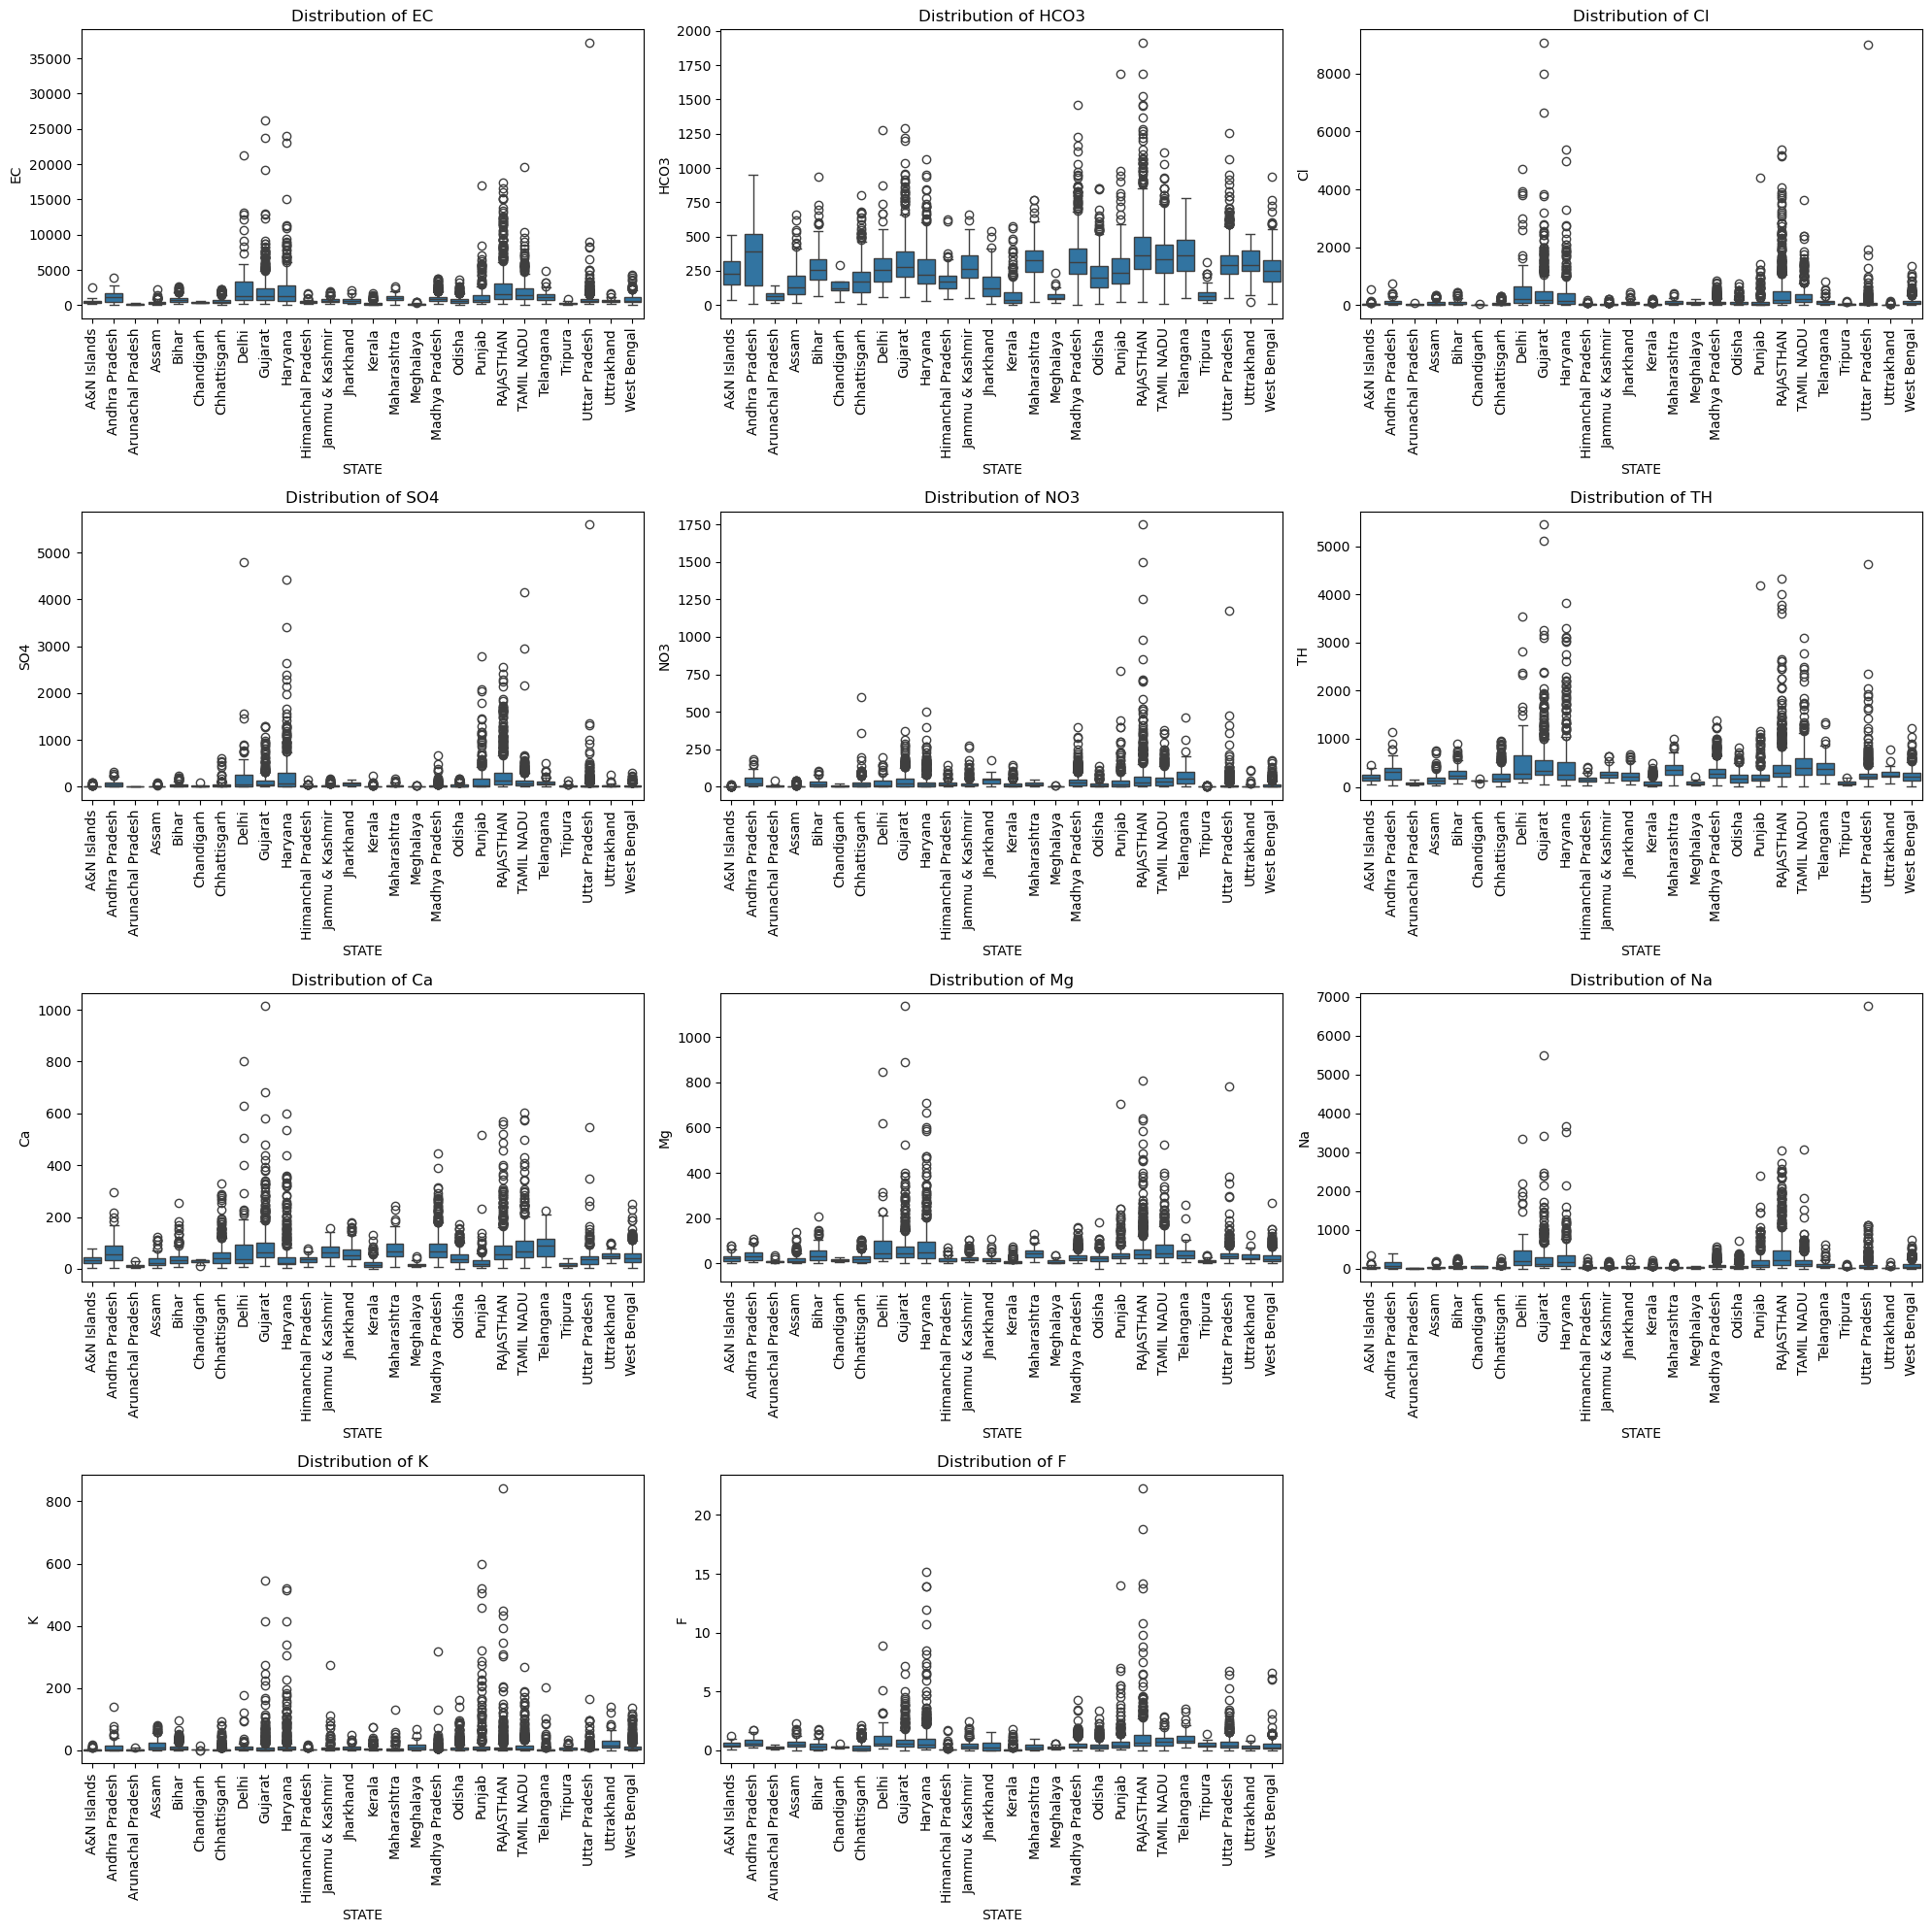

In [25]:
water_quality_params = ['EC', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg', 'Na', 'K', 'F']
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.flatten()
for i, param in enumerate(water_quality_params):
    sns.boxplot(x='STATE', y=param, data=data2, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_title(f'Distribution of {param}')
for j in range(len(water_quality_params), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()
plt.close()

## Correlation Analysis and Checking Multicollinearity

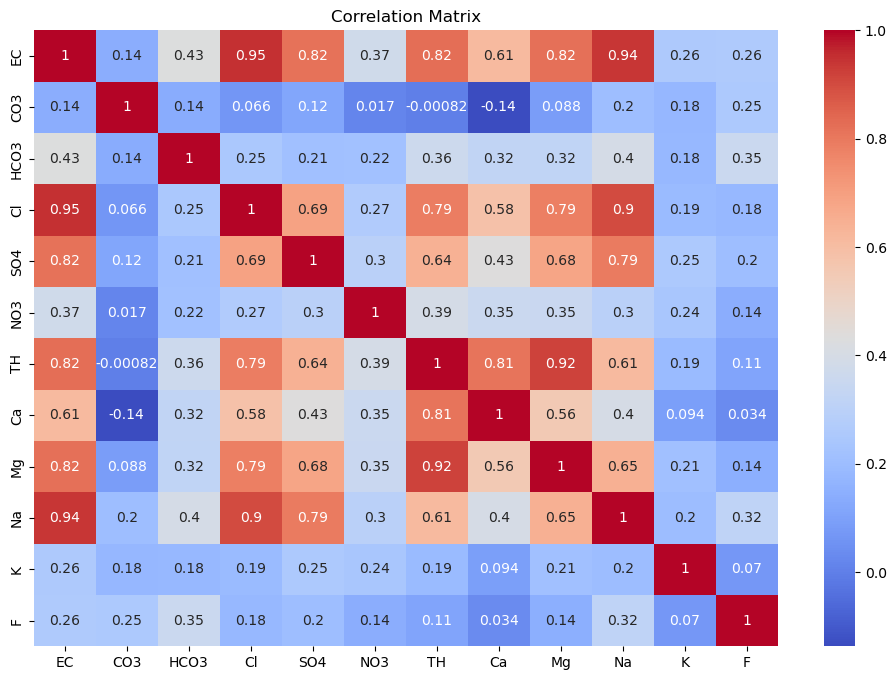

In [26]:
water_quality_params = ['EC','CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg', 'Na', 'K', 'F']
corr_matrix = data2[water_quality_params].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Model Building

In order to create a water quality model, we need a 'water quality' column. To create a water quality column based on the available parameters, we can use multiple criteria to classify the water quality. One common approach is to use the World Health Organization (WHO) guidelines for drinking water quality.

Here we are creating a function classify_water_quality that evaluates several key parameters against WHO guidelines and general water quality standards. It then classifies the water quality based on how many parameters exceed these thresholds.

  <b>Classification Process</b>

For each water sample, the method checks if each parameter falls within the acceptable range.
It counts the number of parameters that exceed their respective thresholds.
Based on the count of exceedances, the water quality is classified as follows:

>  Unsafe: Water is classified as unsafe if any of the following conditions are met:

* pH < 6.5 or pH > 8.5
* EC > 2500 µS/cm
* Cl > 250 mg/L
* SO4 > 250 mg/L
* NO3 > 45 mg/L
* TH > 300 mg/L as CaCO3
* F > 1.5 mg/L


> Moderate: If not classified as unsafe, water is considered moderate quality if any of these conditions are met:

* EC > 1500 µS/cm
* Cl > 200 mg/L
* SO4 > 200 mg/L
* NO3 > 20 mg/L
* TH > 200 mg/L as CaCO3
* F > 1.0 mg/L

> Safe: If all parameters are below the moderate thresholds, the water is classified as safe.

In [27]:
data1.head()

,STATE,DISTRICT,LOCATION,LATITUDE,LONGITUDE,PO4,SiO2,TDS,U(ppb)
0,A&N Islands,South Andaman,Kodiaghat,11.54500,92.74583,NaN,NaN,206.0,4.8
1,A&N Islands,South Andaman,Sippighat,11.60250,92.73000,NaN,NaN,381.0,6.4
2,A&N Islands,South Andaman,Brichganj,11.62083,92.73028,NaN,NaN,151.0,NaN
3,A&N Islands,South Andaman,Wimberleyganj,11.73250,92.70861,NaN,NaN,198.0,0.4
4,A&N Islands,South Andaman,Ograbraj,11.66361,92.65806,NaN,NaN,1424.0,NaN


In [28]:
data1.columns

Index(['STATE', 'DISTRICT', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'PO4', 'SiO2',
       'TDS', 'U(ppb)'],
      dtype='object')

In [29]:
missing_by_state = data1.groupby('STATE').apply(lambda x: x[['PO4', 'SiO2', 'TDS', 'U(ppb)']].isnull().sum())
missing_by_state = missing_by_state.reset_index()
missing_by_state.columns = ['STATE', 'PO4_missing', 'SiO2_missing', 'TDS_missing', 'U(ppb)_missing']
# Calculate total samples per state
total_samples = data1.groupby('STATE').size().reset_index(name='Total_Samples')

# Merge with missing values
missing_by_state = pd.merge(missing_by_state, total_samples, on='STATE')
# Calculate percentage of missing values
for col in ['PO4', 'SiO2', 'TDS', 'U(ppb)']:
    missing_by_state[f'{col}_missing_pct'] = (missing_by_state[f'{col}_missing'] / missing_by_state['Total_Samples']) * 100
# Sort by total missing values
missing_by_state['Total_Missing'] = missing_by_state[['PO4_missing', 'SiO2_missing', 'TDS_missing', 'U(ppb)_missing']].sum(axis=1)
missing_by_state = missing_by_state.sort_values('Total_Missing', ascending=False)

missing_by_state


,STATE,PO4_missing,SiO2_missing,TDS_missing,U(ppb)_missing,Total_Samples,PO4_missing_pct,SiO2_missing_pct,TDS_missing_pct,U(ppb)_missing_pct,Total_Missing
17,Odisha,715,715,715,715,715,100.000000,100.000000,100.0,100.000000,2860
20,TAMIL NADU,620,620,620,5,620,100.000000,100.000000,100.0,0.806452,1865
23,Uttar Pradesh,0,0,841,841,841,0.000000,0.000000,100.0,100.000000,1682
19,RAJASTHAN,0,774,0,774,774,0.000000,100.000000,0.0,100.000000,1548
14,Madhya Pradesh,0,0,0,1153,1153,0.000000,0.000000,0.0,100.000000,1153
8,Gujarat,565,0,0,565,565,100.000000,0.000000,0.0,100.000000,1130
25,West Bengal,511,511,0,26,511,100.000000,100.000000,0.0,5.088063,1048
9,Haryana,4,1,463,463,463,0.863931,0.215983,100.0,100.000000,931
6,Chhattisgarh,0,0,856,0,856,0.000000,0.000000,100.0,0.000000,856
13,Kerala,0,351,351,0,351,0.000000,100.000000,100.0,0.000000,702


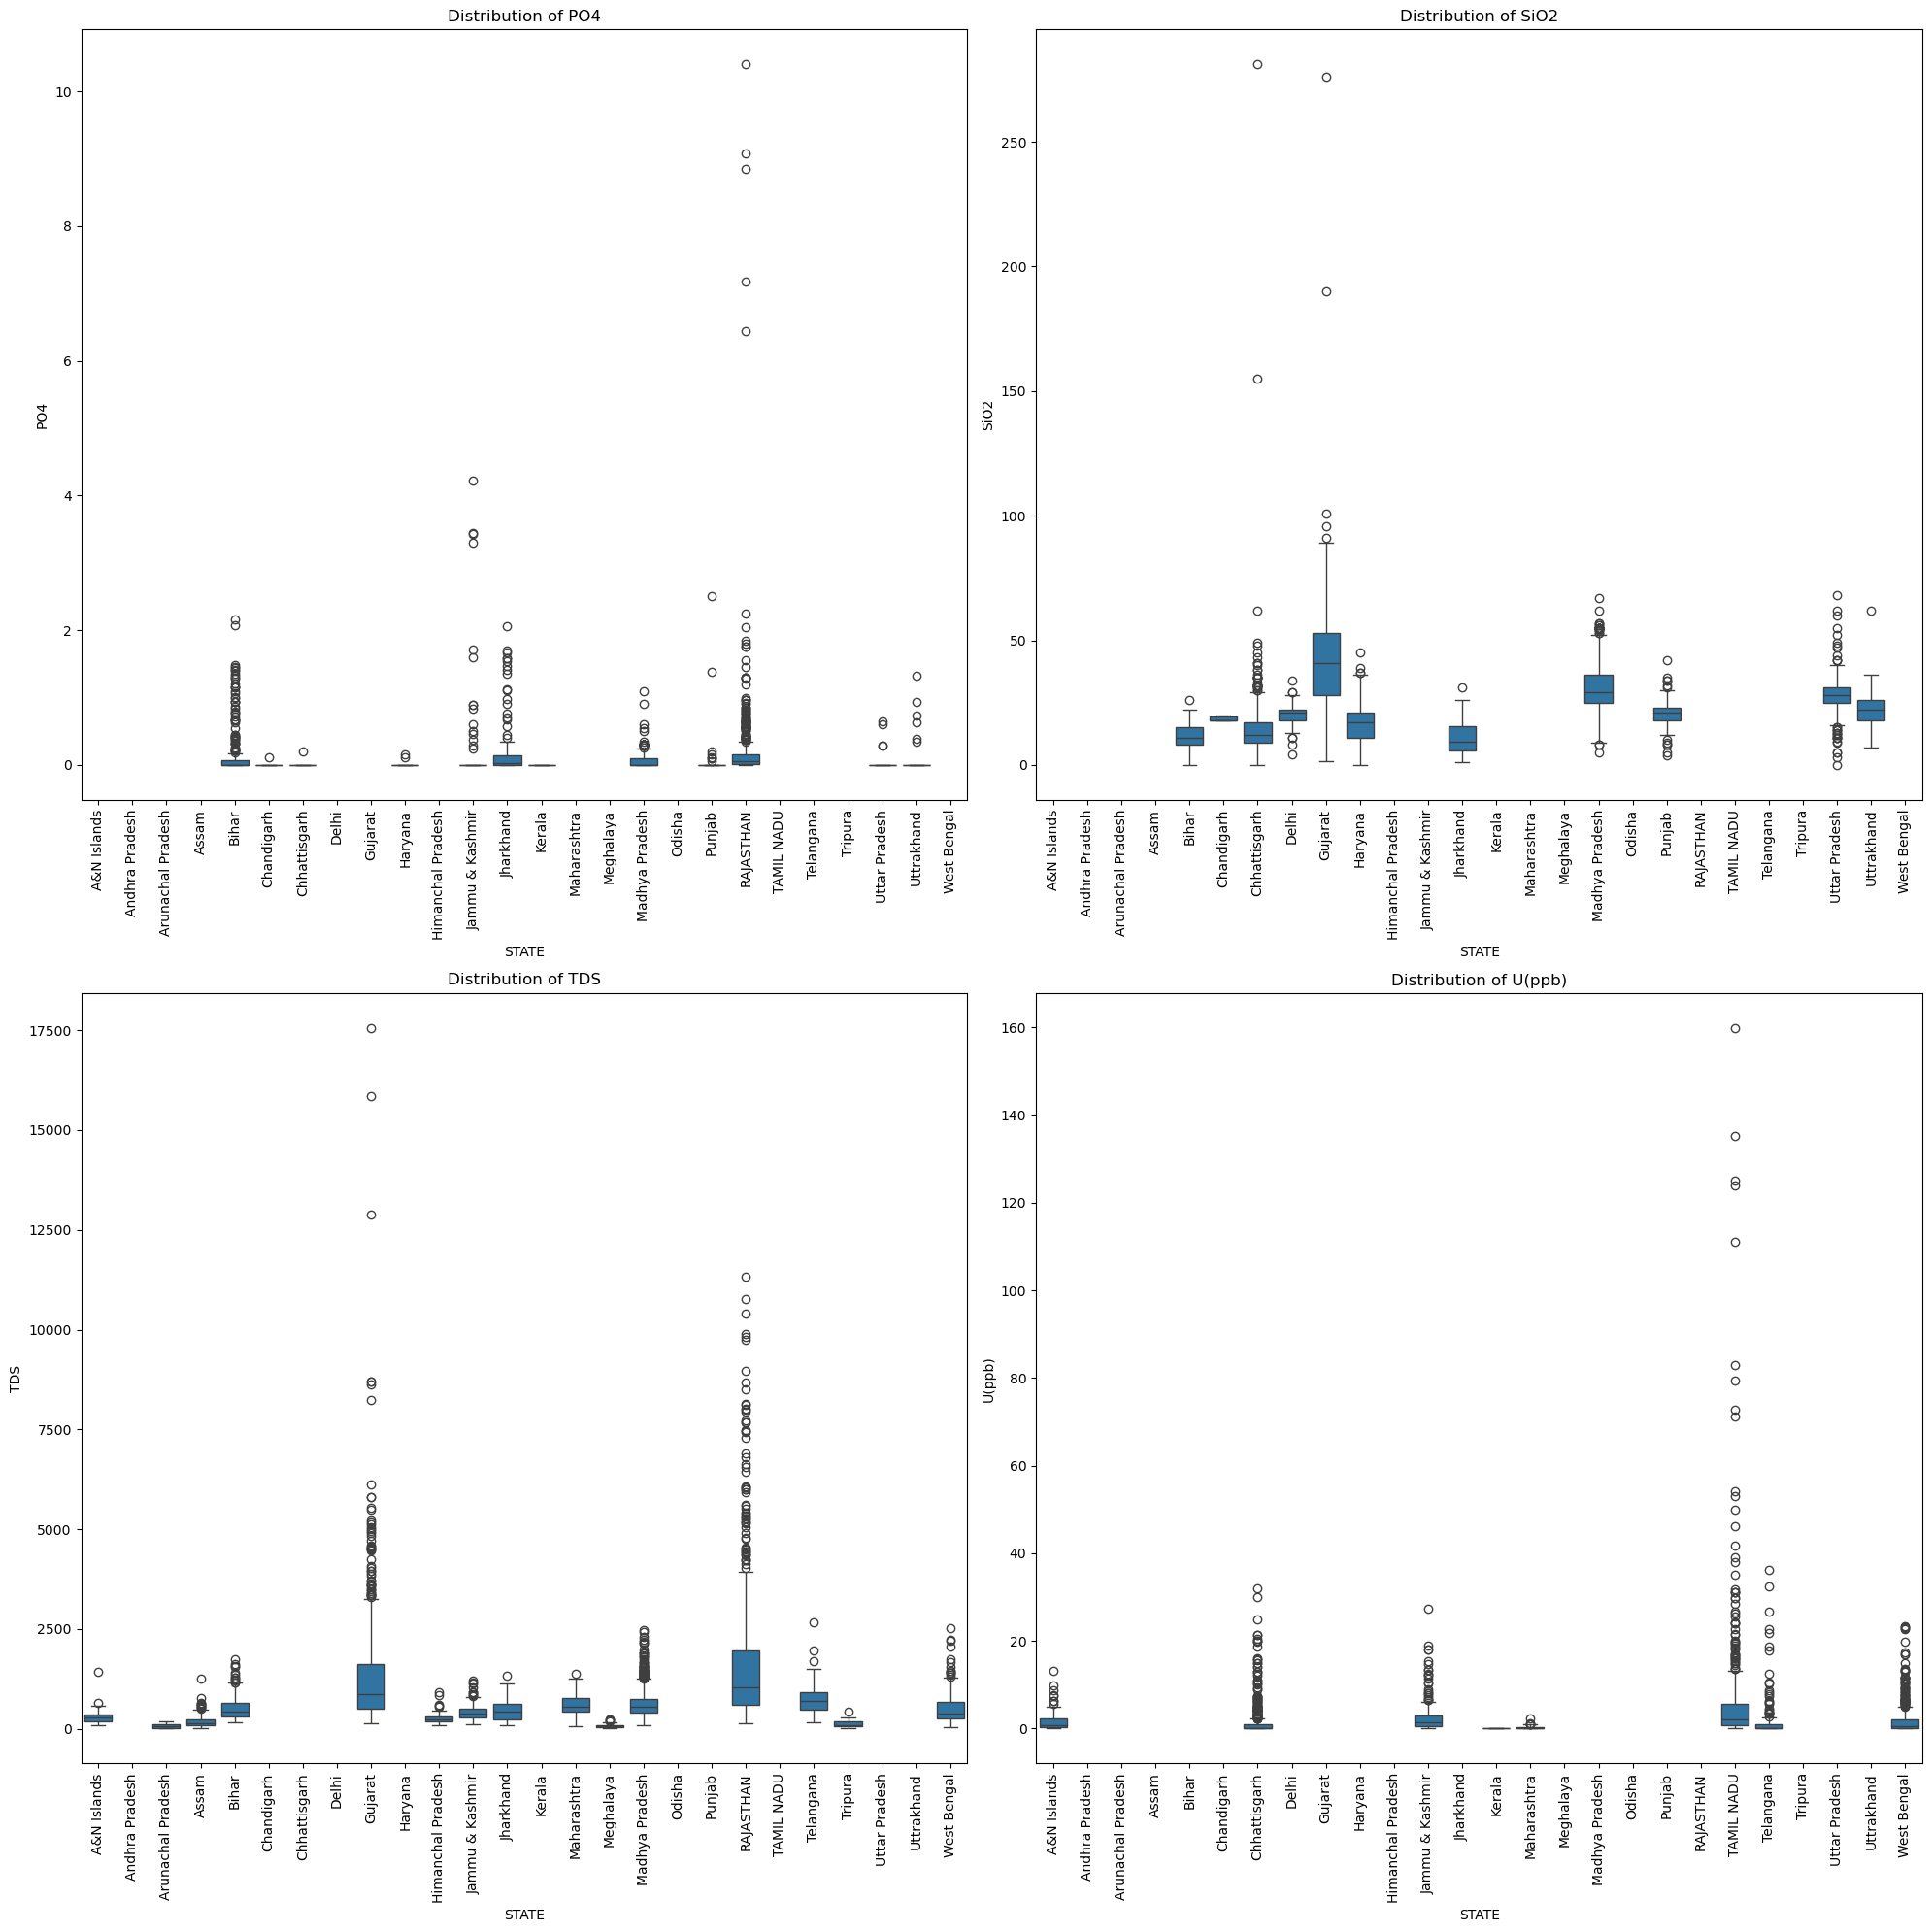

In [30]:
water_quality_params = ['PO4', 'SiO2', 'TDS', 'U(ppb)']
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes = axes.flatten()

for i, param in enumerate(water_quality_params):
    sns.boxplot(x='STATE', y=param, data=data1, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_title(f'Distribution of {param}')

plt.tight_layout()
plt.show()
plt.close()

# Water_Quality Modelling

In order to create a water quality model, we need a 'water quality' column. To create a water quality column based on the available parameters, we can use multiple criteria to classify the water quality. One common approach is to use the World Health Organization (WHO) guidelines for drinking water quality.

Here we are creating a function classify_water_quality that evaluates several key parameters against WHO guidelines and general water quality standards. It then classifies the water quality based on how many parameters exceed these thresholds.

  <b>Classification Process</b>

For each water sample, the method checks if each parameter falls within the acceptable range.
It counts the number of parameters that exceed their respective thresholds.
Based on the count of exceedances, the water quality is classified as follows:

>  Unsafe: Water is classified as unsafe if any of the following conditions are met:

* pH < 6.5 or pH > 8.5
* EC > 2500 µS/cm
* Cl > 250 mg/L
* SO4 > 250 mg/L
* NO3 > 45 mg/L
* TH > 300 mg/L as CaCO3
* F > 1.5 mg/L


> Moderate: If not classified as unsafe, water is considered moderate quality if any of these conditions are met:

* EC > 1500 µS/cm
* Cl > 200 mg/L
* SO4 > 200 mg/L
* NO3 > 20 mg/L
* TH > 200 mg/L as CaCO3
* F > 1.0 mg/L

> Safe: If all parameters are below the moderate thresholds, the water is classified as safe.

In [ ]:
def classify_water_quality(row):
    # Define thresholds based on water quality standards
    # These thresholds are examples and may need adjustment based on specific guidelines
    if (row['pH'] < 6.5 or row['pH'] > 8.5 or
        row['EC'] > 2500 or  # Electrical Conductivity in µS/cm
        row['Cl'] > 250 or   # Chloride in mg/L
        row['SO4'] > 250 or  # Sulfate in mg/L
        row['NO3'] > 45 or   # Nitrate in mg/L
        row['TH'] > 300 or   # Total Hardness in mg/L as CaCO3
        row['F'] > 1.5):     # Fluoride in mg/L
        return 'Unsafe'
    elif (row['EC'] > 1500 or
          row['Cl'] > 200 or
          row['SO4'] > 200 or
          row['NO3'] > 20 or
          row['TH'] > 200 or
          row['F'] > 1.0):
        return 'Moderate'
    else:
        return 'Safe'
data2['Water Quality'] = data2.apply(classify_water_quality, axis=1)        

In [42]:
data2.head()

,STATE,DISTRICT,LOCATION,LATITUDE,LONGITUDE,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F,Water Quality
0,A&N Islands,South Andaman,Kodiaghat,11.54500,92.74583,7.74,349.0,0.0,183.0,25.0,1.0,1.0,175.0,34.0,22.0,10.0,0.0,0.84,Safe
1,A&N Islands,South Andaman,Sippighat,11.60250,92.73000,7.53,660.0,0.0,262.0,82.0,5.0,1.0,250.0,52.0,29.0,51.0,1.0,0.28,Moderate
2,A&N Islands,South Andaman,Brichganj,11.62083,92.73028,7.50,270.0,0.0,116.0,35.0,1.0,0.0,125.0,4.0,28.0,10.0,1.0,0.46,Safe
3,A&N Islands,South Andaman,Wimberleyganj,11.73250,92.70861,7.60,311.0,0.0,159.0,39.0,2.0,0.0,135.0,26.0,17.0,15.0,2.0,0.37,Safe
4,A&N Islands,South Andaman,Ograbraj,11.66361,92.65806,7.82,2501.0,0.0,512.0,560.0,56.0,5.0,465.0,56.0,79.0,336.0,18.0,0.95,Unsafe


In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc

In [46]:
le = LabelEncoder()
data2['Water Quality'] = le.fit_transform(data2['Water Quality'])

print("Label Encoding Mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")


Label Encoding Mapping:
Moderate: 0
Safe: 1
Unsafe: 2


In [2]:
numeric_columns = ['pH', 'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg', 'Na', 'K', 'F']
X = data2[numeric_columns]
y = data2['Water Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict([[10,2,3,6,8,5,0,7,34,68,432,354,87]])
print(classification_report(y_test, y_pred))

NameError: name 'data2' is not defined

In [3]:
feature_importance = pd.DataFrame({'feature': numeric_columns, 'importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for Water Quality Classification')
plt.plot()


NameError: name 'pd' is not defined

[]

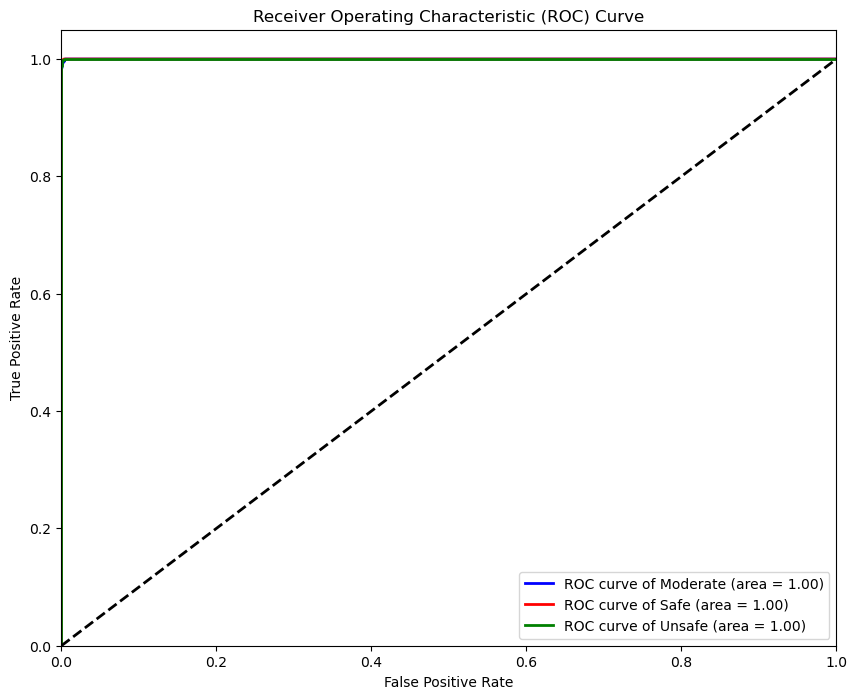

In [50]:
y_score = rf_classifier.predict_proba(X_test)
n_classes = len(le.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color, label in zip(range(n_classes), colors, le.classes_):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of {label} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.plot()